In [1]:
# -*- coding: utf-8 -*-
# @author: tongzi
# @description: combining different models for ensemble learing
# @created date: 2019/09/17
# @last modification: 2019/09/17

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**In this chapter, we will discuss the main concept of regression model and cover the following topics:  
(1) Exploring and visualizing datasets  
(2) Looking at different approaches to implement linear regression models  
(3) Training regression models that are robust to outliers  
(4) Evaluating regression models and diagnosing common problems  
(5) Fitting regression models to nonlinear data**  


The goal of linear regression is to model the relationship between one or multiple
features and a continuous target variable. As discussed in Chapter 1, Giving Computers the Ability to Learn from Data, regression analysis is a subcategory of supervised machine learning. In contrast to classification—another subcategory of supervised learning—**regression analysis aims to predict outputs on a continuous scale rather than categorical class labels.**

### Simple linear regression  
$$y = w_0 + w_1 x$$  
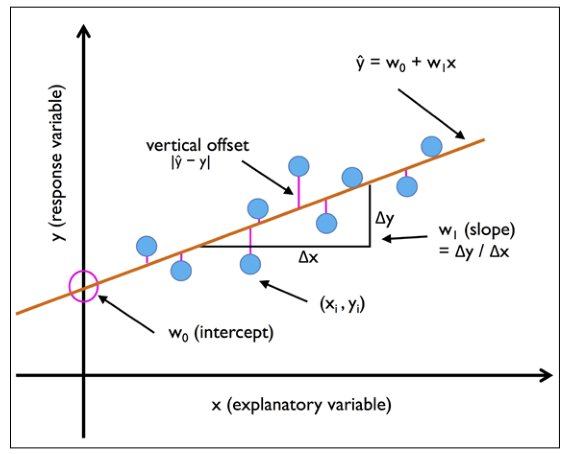  
This best-fitting line is also called the regression line, and the vertical lines from the regression line to the sample points are the so-called offsets or residuals—the errors of our prediction.

### Multiple linear regression  
$$ y = w_0 x_0 + w_1 x_1 + ... + w_m x_m = \sum_{i=0}^{m} w_i x_i = w^T x$$  
Here, $w_0$ is the $y$-axis intercept with $x_0$=1.

### Loading the Housing dataset into a data frame

In [3]:
df = pd.read_csv('./housing.data.txt',sep='\s+')

In [4]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
... 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
... 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


### Visualizing the importance characteristic of a dataset  
**Exploratory Data Analysis (EDA)** is an important and recommended first step prior to the training of a machine learning model. In the rest of this section, we will use some simple yet useful techniques from the graphical EDA toolbox that may help us to visually detect the presence of outliers, the distribution of the data, and the relationships between features.

scatterplot matrix:

In [6]:
import seaborn as sns

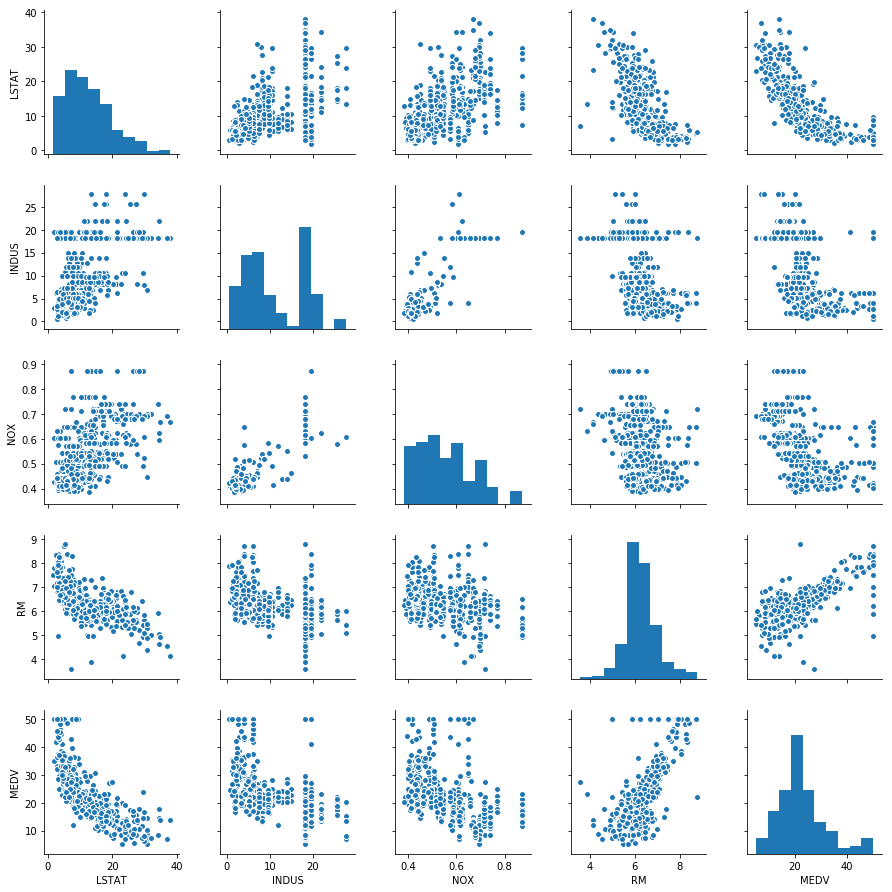

In [7]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()


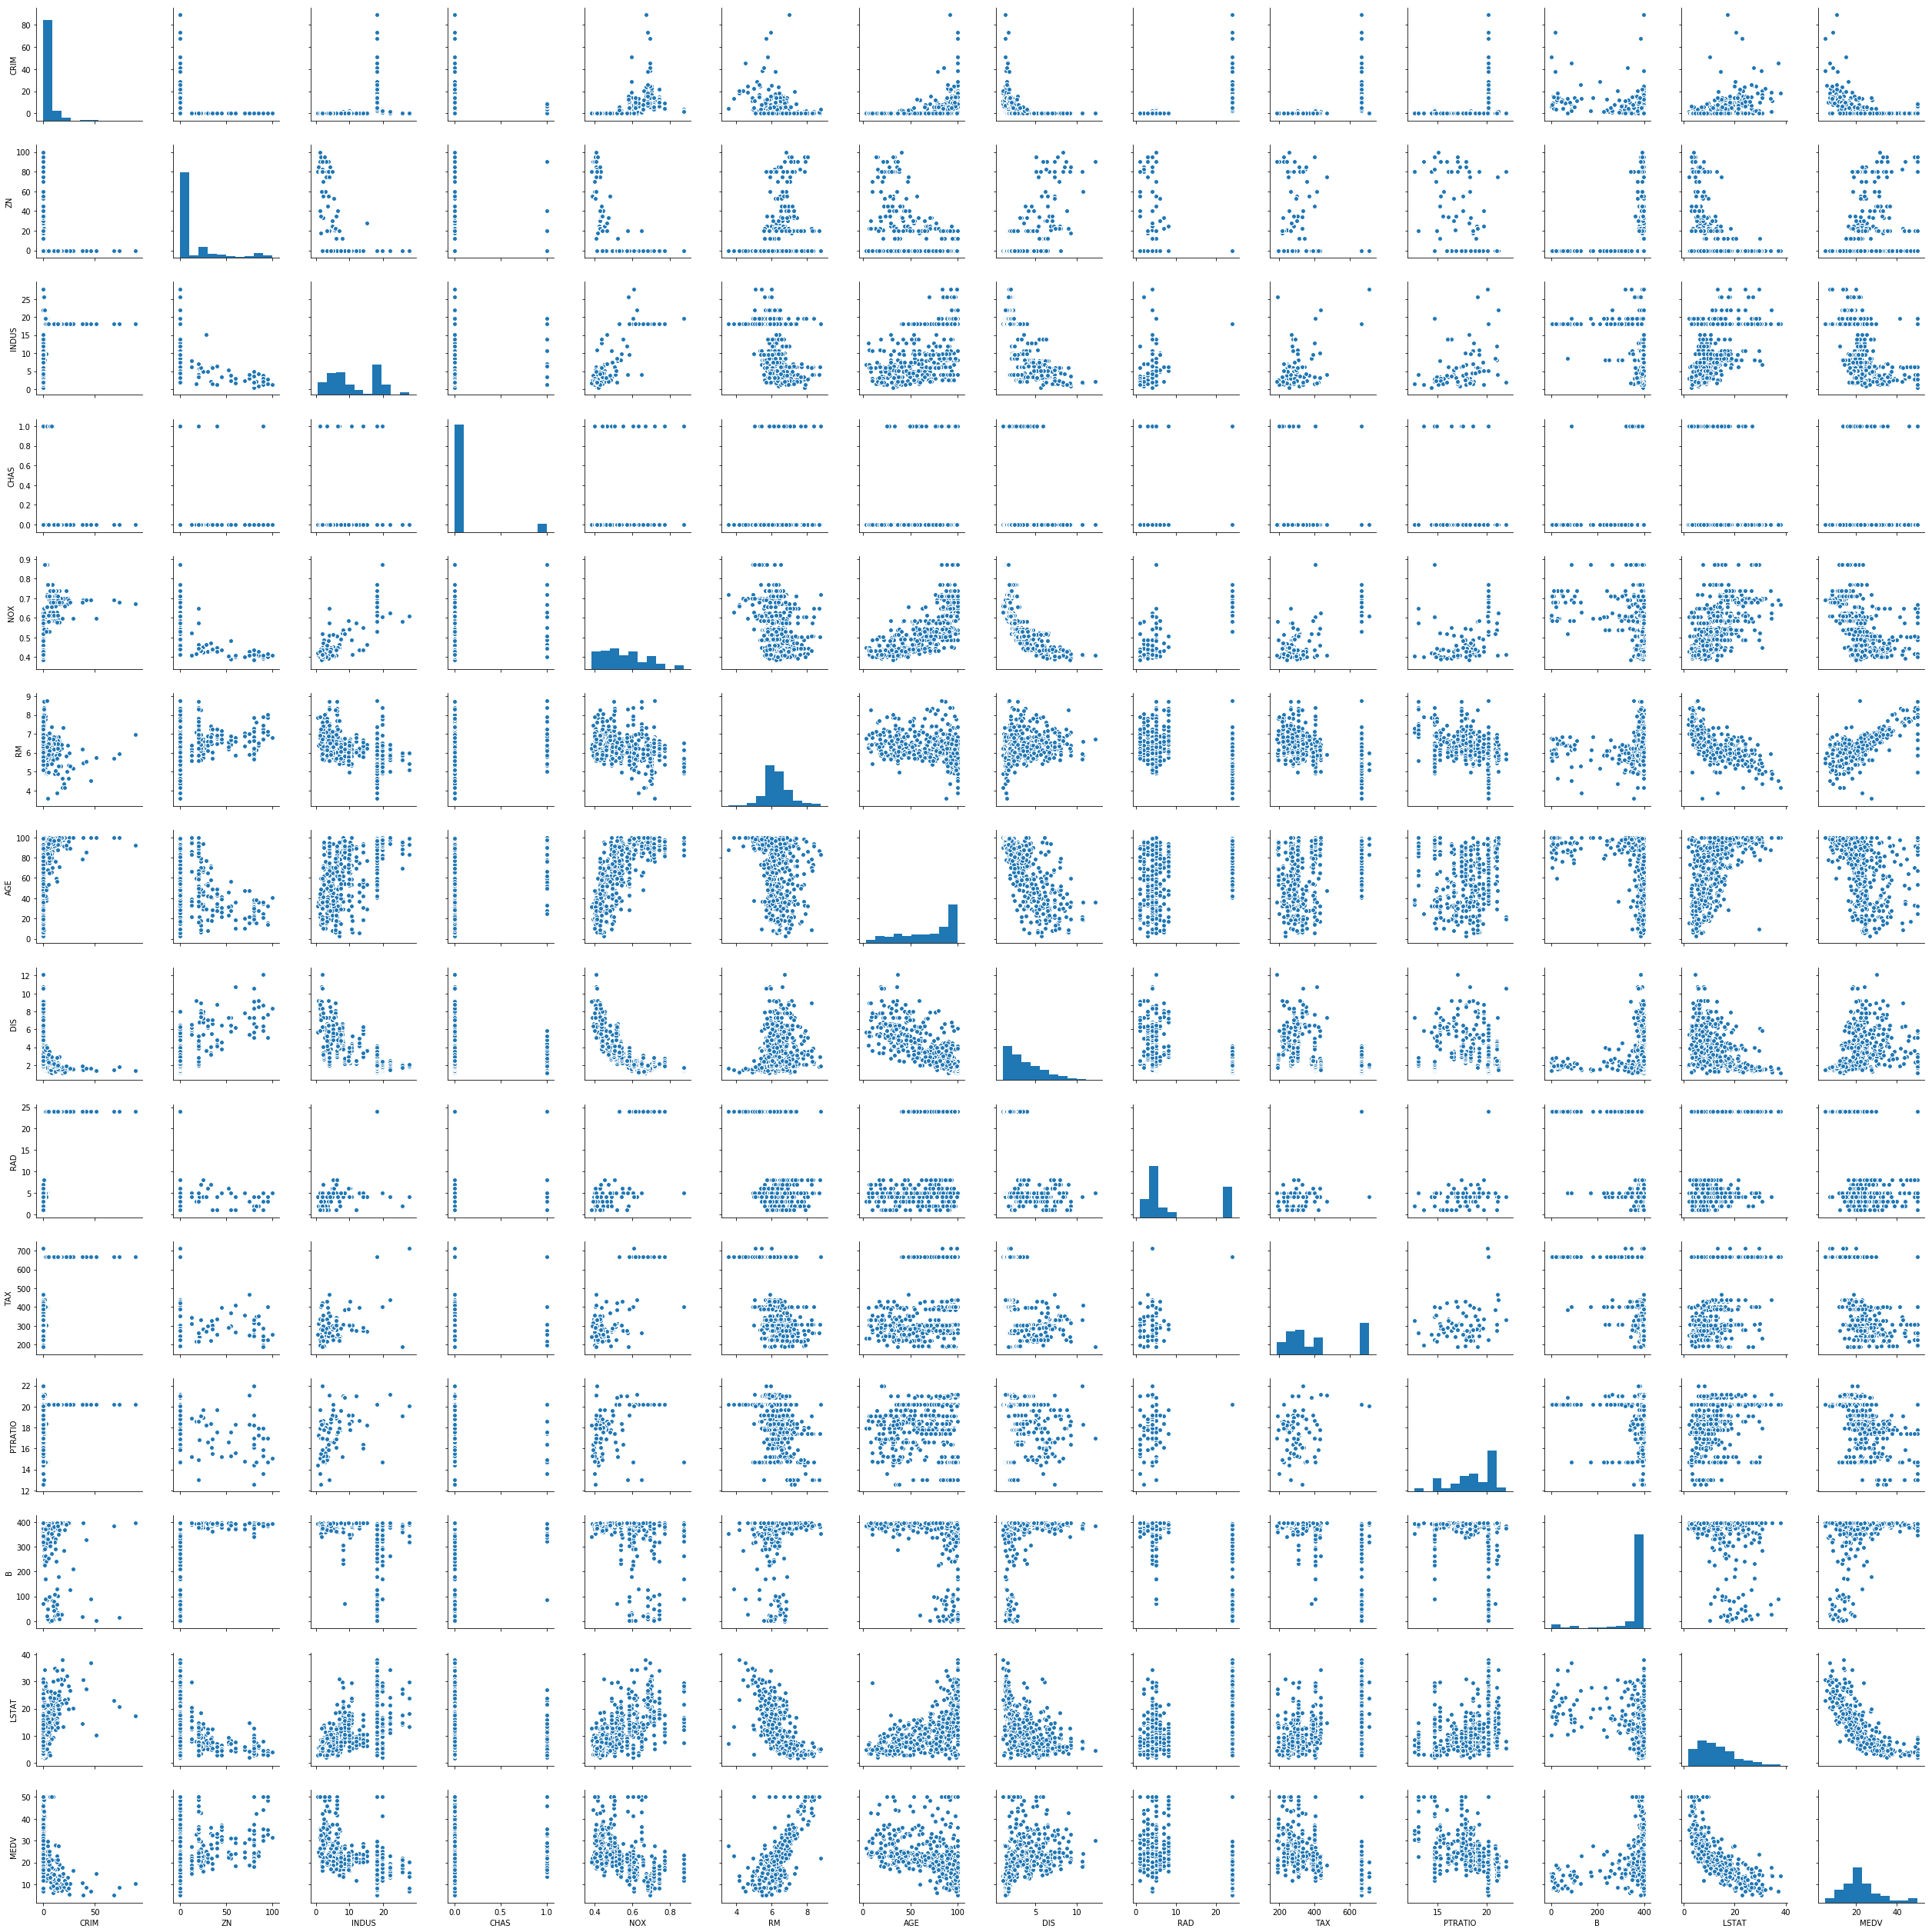

In [8]:
sns.pairplot(df, size=2.5)
plt.tight_layout()

### Looking at relationships using a correlation matirx  
A correlation matrix is closely related to the covariance matrix that we have seen in the section about **Principal Component Analysis (PCA)** in *Chapter 5, Compressing Data via Dimensionality Reduction.* Intuitively, we can interpret the correlation matrix as a rescaled version of the covariance matrix. In fact, the correlation matrix is identical to a covariance matrix computed from standardized features.  
  
The correlation matrix is a square matrix that contains the **Pearson product-moment correlation coefficient (often abbreviated as Pearson's r)**, which measure the linear dependence between pairs of features. The correlation  coefficients are in the range -1 to 1. Two features have a perfect positive correlation if 1 r = , no correlation if 0 r = , and a perfect negative correlation if 1 r = − . As mentioned previously, Pearson's correlation coefficient can simply be calculated as the covariance between two features x and y (numerator) divided by the product of their standard deviations (denominator):  
$$ r = \frac{\sum_{i=1}^n \left[ \left( x^{(i)} - \mu_x \right) \left( y^{(i)} - \mu_y \right) \right]}{\sqrt{\sum_{i=1}^n \left( x^{(i)} - \mu_x \right)^2} \sqrt{\sum_{i=1}^n \left( y^{(i)} - \mu_y \right)^2}} =\frac{cov(x,y)}{\sigma_x \sigma_y} =\frac{\sigma_{xy}}{\sigma_x \sigma_y} $$

In [9]:
# each row represents a variable by default
cm = np.corrcoef(df[cols].values.T)

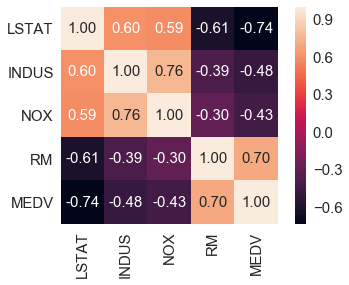

In [10]:
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                annot_kws={'size':15}, yticklabels=cols,
                xticklabels=cols)
plt.show()

### Solving regresion for regression parameters with gradient descent  
we defined a cost function $J(⋅)$ , which we minimized to learn the weights via optimization algorithms, such as **Gradient Descent (GD)** and **Stochastic Gradient Descent (SGD)**. This cost function in Adaline is the **Sum of Squared Errors (SSE)**, which is identical to the cost function that we use for OLS:  
$$ J(w) = \frac{1}{2} \sum_{i=1}^n \left( y^{(i)} - \hat{y}^{(i)} \right)^2 $$

In [11]:
class LinearRegressionGD:
    
    def __init__(self, eta=0.001, n_iter=30):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = 0.5 * (errors**2).sum()
            self.cost_.append(cost)
        return self
    
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    

    
    def predict(self, X):
        return self.net_input(X)

In [12]:
X = df[['RM']].values
y = df[['MEDV']].values

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc_x = StandardScaler()
sc_y = StandardScaler()

In [15]:
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y).flatten()

In [16]:
print(y_std.shape)
print(X_std.shape)

(505,)
(505, 1)


In [17]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

Text(0,0.5,'SSE')

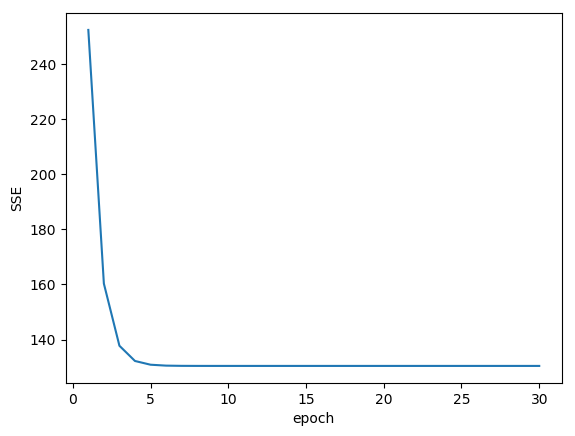

In [18]:
# reset matplotlib style
sns.reset_orig()

plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.xlabel('epoch')
plt.ylabel('SSE')

Now, let's visualize how well the linear regression line fits the training data:

In [19]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=50)
    plt.plot(X, model.predict(X), color='black', lw=2)
    

Text(0,0.5,'Price in $1000s [MEDV] (standardized)')

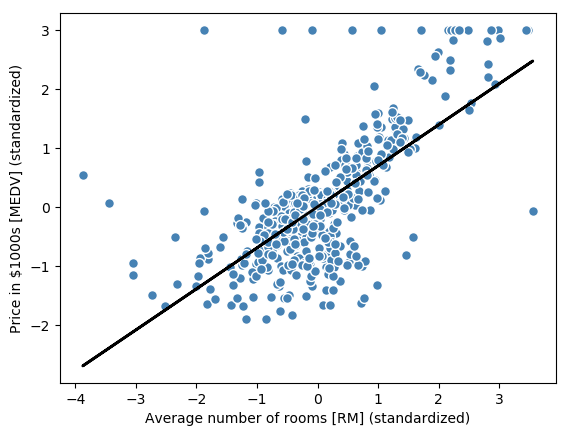

In [20]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

In certain applications, it may also be important to report the predicted outcome variables on their original scale. To scale the predicted price outcome back onto the Price in $1000s axis, we can simply apply the inverse_transform method of the StandardScaler:

In [21]:
num_room_std = sc_x.transform([[5.0]])
price_std = lr.predict(num_room_std)
print('Price in $1000s: {}'.format(sc_y.inverse_transform(price_std)))

Price in $1000s: [10.84048988]


On a side note, it is also worth mentioning that we technically don't have to update
the weights of the intercept if we are working with standardized variables since
the y-axis intercept is always 0 in those cases. We can quickly confirm this by
printing the weights:

In [22]:
print(f'Slope: {lr.w_[1]:.3f}')

Slope: 0.695


In [23]:
print(f'Intercept: {lr.w_[0]:.3f}')

Intercept: 0.000


### Estimating coefficent of a regression model via scikit-learn

In [24]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
print(f'Slope: {slr.coef_[0]}')

Slope: [9.10348156]


In [26]:
print(f'Intercept: {slr.intercept_}')

Intercept: [-34.67691791]


Text(0,0.5,'Price in $1000s [MEDV] (standardized)')

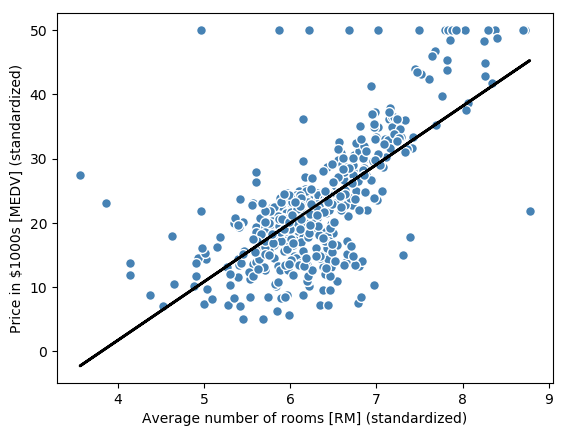

In [27]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

>As an alternative to using machine learning libraries, there is also
a closed-form solution for solving OLS involving a system of linear
equations that can be found in most introductory statistics textbooks:  
$$ w = (X^T X)^{-1} X^T y $$

In [28]:
Xb = np.hstack((np.ones((X.shape[0],1)), X))

In [29]:
w = np.linalg.inv(Xb.T @ Xb) @ Xb.T @ y

In [30]:
print(f'Slope: {w[1]}')

Slope: [9.10348156]


In [31]:
print(f'Intercept: {w[0]}')

Intercept: [-34.67691791]


>The advantage of this method is that it is guaranteed to find the optimal
solution analytically. However, if we are working with very large
datasets, it can be computationally too expensive to invert the matrix in
this formula (sometimes also called the normal equation) or the sample
matrix may be singular (non-invertible), which is why we may prefer
iterative methods in certain cases.

### Fitting a robust regression model using RANSAC  
Linear regression models can be heavily impacted by the presence of outliers.
In certain situations, a very small subset of our data can have a big effect on the
estimated model coefficients.   
  
As an alternative to throwing out outliers, we will look at a robust method of
regression using the **RANdom SAmple Consensus (RANSAC)** algorithm, which fits a regression model to a subset of the data, the so-called inliers.  
  
We can summarize the iterative RANSAC algorithm as follows:  
1.Select a random number of samples to be inliers and fit the model.  
2.Test all other data points against the fitted model and add those points that
fall within a user-given tolerance to the inliers.  
3.Refit the model using all inliers.  
4.Estimate the error of the fitted model versus the inliers.  
5.Terminate the algorithm if the performance meets a certain user-defined
threshold or if a fixed number of iterations were reached; go back to step 1
otherwise.

In [32]:
from sklearn.linear_model import RANSACRegressor

In [34]:
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=50,
                        loss='absolute_loss',
                        residual_threshold=5.0,
                        random_state=0)

In [35]:
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=0,
        residual_metric=None, residual_threshold=5.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

We set the maximum number of iterations of the RANSACRegressor to 100, and using
min_samples=50 , we set the minimum number of the randomly chosen samples to
be at least 50. Using the 'absolute_loss' as an argument for the residual_metric
parameter, the algorithm computes absolute vertical distances between the fitted line and the sample points. By setting the residual_threshold parameter to 5.0 , we
only allowed samples to be included in the inlier set if their vertical distance to the fitted line is within 5 distance units, which works well on this particular dataset.  
  
By default, scikit-learn uses the **MAD** estimate to select the inlier threshold, where MAD stands for the **Median Absolute Deviation** of the target values y . However, the choice of an appropriate value for the inlier threshold is problem-specific, which is one disadvantage of RANSAC. 

After we fit the RANSAC model, let's obtain the inliers and outliers from the fitted RANSAC-linear regression model and plot them together with the linear fit:

In [36]:
inlier_mask = ransac.inlier_mask_

In [37]:
outlier_mask = np.logical_not(inlier_mask)

In [38]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, None])

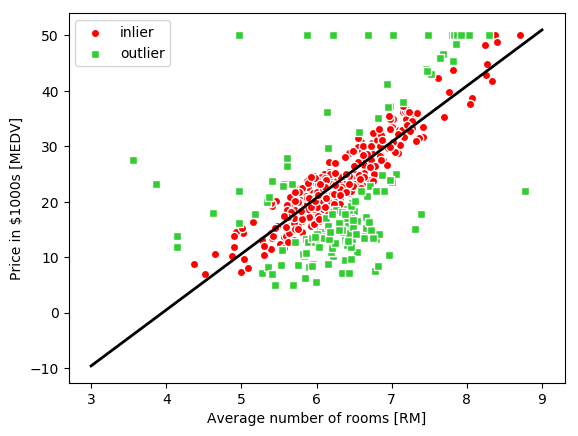

In [39]:
plt.scatter(X[inlier_mask], y[inlier_mask], color='red', marker='o', 
            edgecolor='white', label='inlier')
plt.scatter(X[outlier_mask], y[outlier_mask], color='limegreen', edgecolor='white',
           marker='s', label='outlier')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')

When we print the slope and intercept of the model by executing the following code,
we can see that the linear regression line is slightly different from the fit that we obtained in the previous section without using RANSAC:

In [40]:
print(f'Slope: {ransac.estimator_.coef_[0]}')

Slope: [10.09893264]


In [41]:
print(f'Intercept: {ransac.estimator_.intercept_}')

Intercept: [-39.91516108]


### Evaluating the performance of linear regression model  
As we remember from Chapter 6, Learning Best Practices for Model Evaluation and
Hyperparameter Tuning, we want to split our dataset into separate training and
test datasets where we use the former to fit the model and the latter to evaluate its performance to generalize to unseen data. Instead of proceeding with the simple
regression model, we will now use all variables in the dataset and train a multiple
regression model:

In [44]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)

In [46]:
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

Since our model uses multiple explanatory variables, we can't visualize the linear
regression line (or hyperplane to be precise) in a two-dimensional plot, but we
can plot the residuals (the differences or vertical distances between the actual and
predicted values) versus the predicted values to diagnose our regression model.
**Residual plots** are a commonly used graphical tool for diagnosing regression
models. They can help detect nonlinearity and outliers, and check whether the errors
are randomly distributed.

(-10, 50)

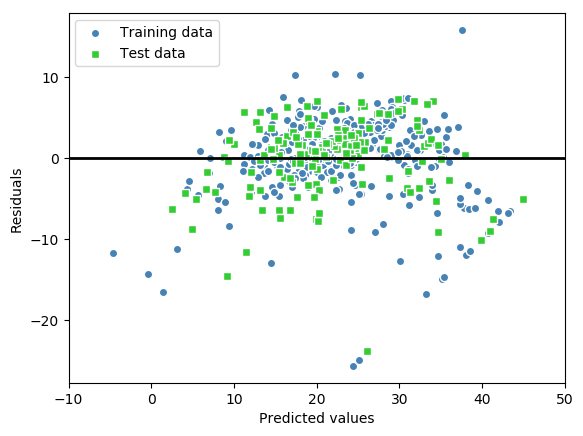

In [47]:
plt.scatter(y_train_pred, y_train_pred - y_train, color='steelblue', marker='o',
           edgecolor='white', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, color='limegreen', marker='s',
            edgecolor='white', label='Test data')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.xlim([-10, 50])


Another useful quantitative measure of a model's performance is the so-called
**Mean Squared Error (MSE)**, which is simply the averaged value of the SSE cost
that we minimized to fit the linear regression model. The MSE is useful to compare
different regression models or for tuning their parameters via grid search and
cross-validation, as it normalizes the SSE by the sample size:  
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} \left( y^{(i)} - \hat{y}^{(i)} \right)^2 $$

In [48]:
from sklearn.metrics import  mean_squared_error

In [49]:
print(f'MSE train: {mean_squared_error(y_train, y_train_pred):.3f}')

MSE train: 22.390


In [50]:
print(f'MSE test: {mean_squared_error(y_test, y_test_pred):.3f}')

MSE test: 21.382
